**기본 세팅**

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

mpl.rc('font', family='NanumGothic') # 폰트 설정
mpl.rc('axes', unicode_minus=False) # 유니코드에서 음수 부호 설정

# 차트 스타일 설정
sns.set(font="NanumGothic", rc={"axes.unicode_minus":False}, style='darkgrid')
plt.rc("figure", figsize=(10,8))

warnings.filterwarnings("ignore")

---

# 신경망 데이터 표현

## 텐서(Tensor)
- 일반적으로 텐서는 3차원 이상을 다룰 때 표현하는 방식이지만, 여기서는 어떠한 데이터를 표현할 때, 그 값 모두를 텐서라고 부르기로 함

      a = np.array([1, 2])
      b = np.array([[1, 2],
                    [3, 4]])
      c = np.array([10]) 
      d = np.array(3)  
  
    a, b, c, d 모두 텐서라고 지칭할 수 있음
  
- 랭크(rank): 텐서의 축을 나타내고, 넘파이(numpy)의 `ndim`으로 구할 수 있음

      a = np.array([1, 2])
        >> ndim = 1  
      b = np.array([[1, 2],
                    [3, 4]])
        >> ndim = 2
      d = np.array(3)
        >> ndim = 0
      
    위의 예시에서 알 수 있듯이 대괄호( [ ] )의 개수가 곧 랭크(축)의 값
    
      
- 크기(shape): 텐서의 각 축을 따라 얼마나 많은 차원이 있는지를 나타내며, 파이썬의 튜플(tuple) 형태


## 그림으로 이해하기

![array](https://www.oreilly.com/library/view/elegant-scipy/9781491922927/assets/elsp_0105.png)
<br /><sub>출처: https://www.oreilly.com/library/view/elegant-scipy/9781491922927/ch01.html</sub>

## 스칼라(0차원 텐서)
- 하나의 숫자를 담고 있는 텐서(tensor)
- 형상은 없음

In [3]:
x = np.array(3)

print(x)
print(x.ndim)
print(x.shape)

3
0
()


## 벡터(1차원 텐서)
- 숫자의 배열을 나타내는 텐서


In [4]:
x = np.array([1,2,3,4])

print(x)
print(x.ndim)
print(x.shape)

[1 2 3 4]
1
(4,)


### 벡터의 합
- 같은 형상(shape)일 때, 각 원소별로 계산

In [5]:
a = np.array([1,2,3,4])
b = np.array([5,6,7,8])
c = a + b

print(a)
print(b)
print(c)
print(c.ndim)
print(c.shape)

[1 2 3 4]
[5 6 7 8]
[ 6  8 10 12]
1
(4,)


### 벡터의 곱
-  $A = (x_1, \ x_2, \ x3, \ ..., \ x_n)$  
  $B = (y_1, \ y_2, \ y3, \ ..., \ y_n)$ 일 때,
- 원소곱
  - 같은 형상(shape)일 때, 각 원소별로 계산   
   
    $A \times B = (x_1, \ x_2, \ x_3, \ ..., \ x_n) \times (y_1, \ y_2, \ y_3, \ ..., \ y_n) \\   
    \qquad = (x_1y_1, \ x_2y_2, \ x_3y_3, \ ... \ ,  \ x_ny_n)  $
    
- 벡터곱(product, dot)
  - 두 1차원 벡터가 있을 때 **각각의 성분끼리의 곱을 모두 더하는 계산**  
  
    $A \bullet B \Rightarrow A \times B^T = (x_1, \ x_2, \ x_3, \ ..., \ x_n) \begin{pmatrix} y_1 \\ y_2 \\ y_3 \\ ... \\ y_n  \end{pmatrix} \\  
    \qquad = (x_1y_1 + \ x_2y_2 + \ x_3y_3 + \ ... + \ x_ny_n)  $
  

In [6]:
a = np.array([1,2,3,4])
b = np.array([5,6,7,8])

# 원소곱
c = a * b

print(c)
print(c.ndim)
print(c.shape)

print("-"*20)

# 벡터곱
x = np.array([1,2,0])
y = np.array([0,2,1])
z = np.dot(x,y) 

print(z)
print(z.ndim)
print(z.shape)

[ 5 12 21 32]
1
(4,)
--------------------
4
0
()


## 스칼라와 벡터의 곱


In [7]:
# 스칼라
a = np.array(10)

# 벡터
b = np.array([1,2,3])

print(a*b)

[10 20 30]


## 2차원 텐서(행렬)
- 2차원 텐서는 행렬로 생각할 수 있음
    - (m, n) 형상의 배열

![matrix](https://upload.wikimedia.org/wikipedia/commons/thumb/4/4d/Matrix_ko.svg/570px-Matrix_ko.svg.png)
<br /><sub>출처: https://ko.wikipedia.org/wiki/%ED%96%89%EB%A0%AC</sub>


In [8]:
matrix = np.array([[1,2,3],
                   [4,5,6]])

print(matrix)
print(matrix.ndim)
print(matrix.shape)

print("-"*20)

matrix2 = np.array([[1,2,3,4]])

print(matrix2)
print(matrix2.ndim)
print(matrix2.shape)

[[1 2 3]
 [4 5 6]]
2
(2, 3)
--------------------
[[1 2 3 4]]
2
(1, 4)


### 행렬 원소곱
- 같은 형상(shape)일 때 덧셈, 곱셈과 같은 연산은 원소별로 진행


In [9]:
A = np.array([[1,2],
              [3,4]])

B = np.array([[10,10],
              [10,10]])

print(f"행렬 A:\n {A}")
print(f"행렬 B:\n {B}")
print(f"행렬 A * B:\n {A*B}")

행렬 A:
 [[1 2]
 [3 4]]
행렬 B:
 [[10 10]
 [10 10]]
행렬 A * B:
 [[10 20]
 [30 40]]


### 행렬 점곱(내적, product)
- 1차원 벡터와 마찬가지로 앞 행렬의 열과 뒤 행렬의 행의 수가 같아야함

In [10]:
# M: 2 x 2
M = np.array([[1,2],
              [3,4]])

# N: 2 x 2
N = np.array([[2,3,4],
              [2,3,4]])

M @ N

array([[ 6,  9, 12],
       [14, 21, 28]])

In [11]:
# 앞 행렬의 열과 뒤 행렬의 행의 수가 같지 않으면 에러가 발생한다.
m = np.array([[1], [2], [3]])
n = np.array([[1], [2], [3]])

m @ n

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 1)

### 역행렬
- 어떤 행렬 A가 있을 때, 곱해서 단위행렬(E)를 만드는 행렬 B가 존재한다면, 행렬 B는 A의 역행렬

In [ ]:
A = np.array([[1,2],
              [3,4]])

# 역행렬
B = np.linalg.inv(A)

print(A)
print(B)
print(A @ B)

In [11]:
# 역행렬이 존재하지 않을 때
B = np.array([[2,1],
              [2,1]])

print(np.linalg.inv(B))

LinAlgError: Singular matrix

### 전치행렬
- 행과 열을 바꾼 배열의 형태

![](https://upload.wikimedia.org/wikipedia/commons/e/e4/Matrix_transpose.gif)
<br /><sub>출처: https://ko.wikipedia.org/wiki/%EC%A0%84%EC%B9%98%ED%96%89%EB%A0%AC</sub>

In [12]:
A = np.array([[1,2,3],
              [4,5,6]])

# 전치행렬
A_T = A.T

print(A_T)

[[1 4]
 [2 5]
 [3 6]]


## 3차원 텐서
- 보통 이미지를 나타낼 때 사용되는 텐서
  - (width, height, channels)
  - 일반적으로 Numpy array로 표현  
![3d tensor](https://image.slidesharecdn.com/tensordecomposition-170301235239/95/a-brief-survey-of-tensors-5-638.jpg)
<br /><sub>출처: https://www.slideshare.net/BertonEarnshaw/a-brief-survey-of-tensors</sub>
- 시계열 데이터 또는 시퀀스(sequence) 데이터를 표현할 때도 사용
  - (samples, timesteps, features)
  - (예시) 주식 가격 데이터셋, 시간에 따른 질병 발병 건수  
![](https://kr.mathworks.com/help/deeplearning/ug/timeseriesforecastingusingdeeplearningexample_01_ko_KR.png)
<br /><sub>출처: https://kr.mathworks.com/help/deeplearning/examples/time-series-forecasting-using-deep-learning.html</sub>

In [14]:
# 3 x 3 x 4
X = np.array([
    [[5,3,2,1],
     [5,5,3,1],
     [6,1,2,3]],
    
    [[1,1,1,1],
     [3,4,7,5],
     [1,8,3,4]],
    
    [[10,9,3,9],
     [5,4,3,2],
     [7,6,3,4]]
])

print(X)
print(X.shape)
print(X.ndim)

[[[ 5  3  2  1]
  [ 5  5  3  1]
  [ 6  1  2  3]]

 [[ 1  1  1  1]
  [ 3  4  7  5]
  [ 1  8  3  4]]

 [[10  9  3  9]
  [ 5  4  3  2]
  [ 7  6  3  4]]]
(3, 3, 4)
3


In [20]:
# 2 x 2 x 3
B = np.array([
    [[2,3,4],
     [5,6,7]],
    
    [[1,2,3],
     [4,5,6]]
])

print(B)

print("-"*20)

# 3차원 텐서 전치: 3 x 2 x 2
print(B.T)

[[[2 3 4]
  [5 6 7]]

 [[1 2 3]
  [4 5 6]]]
--------------------
[[[2 1]
  [5 4]]

 [[3 2]
  [6 5]]

 [[4 3]
  [7 6]]]


### 3차원 텐서 활용 예시(이미지)
- MNIST Dataset
- 28x28 사이즈의 gray scale 이미지들로 구성  
![이미지](https://upload.wikimedia.org/wikipedia/commons/thumb/2/27/MnistExamples.png/440px-MnistExamples.png)  
<sub>출처: https://ko.wikipedia.org/wiki/MNIST_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B2%A0%EC%9D%B4%EC%8A%A4</sub>

  
- gray scale: 0~255의 값을 통해 밝기를 표현 
  0으로 갈수록 어두워지고, 255로 갈수록 밝아짐 
![이미지](https://miro.medium.com/max/1400/1*euc4RxnNo78LFEGrb-QZ7w.jpeg)  
<sub>출처: https://medium.com/@himnickson/converting-rgb-image-to-the-grayscale-image-in-java-9e1edc5bd6e7</sub>



In [31]:
# keras mnist 데이터 불러오기
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [37]:
# 3차원 60000 x 28 x 28
print(train_images.ndim)
print(train_images.shape)

3
(60000, 28, 28)


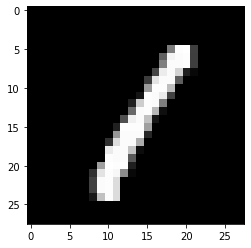

In [40]:
# 3차원 텐서로 이미지 표시 가능
# print(train_images[3])

temp_image = train_images[3]

plt.imshow(temp_image, cmap="gray")
plt.show()

## 브로드캐스팅(broadcasting)
- 넘파이에서 다른 형상(shape)끼리 계산 가능

- 1차원 텐서

![1d](https://numpy.org/doc/1.18/_images/theory.broadcast_1.gif)

- 2차원 텐서

![2d](https://numpy.org/doc/1.18/_images/theory.broadcast_2.gif)

- 더 작은 형상(shape)이 형상이 더 큰 배열에 확장 가능해야함

![broadcast](https://numpy.org/doc/1.18/_images/theory.broadcast_3.gif) 

- (참고) 아래의 경우도 가능

![broadcast](https://numpy.org/doc/1.18/_images/theory.broadcast_4.gif)

<br /><sub>https://numpy.org/doc/1.18/user/theory.broadcasting.html#array-broadcasting-in-numpy</sub>

In [47]:
# 스칼라 (0차원)
a = np.array(10)

# 1차원
b = np.array([10,20,30])

print(a * b)
print(np.dot(a,b))

[100 200 300]
[100 200 300]


In [48]:
# 2 x 2 (2차원)
A = np.array([[1,2],
              [3,4]])

# 1차원
B = np.array([10,20])

print(A*B)

[[10 40]
 [30 80]]


In [50]:
# 2 x 2 x 3 (3차원)
A = np.array([
    [[1,1,1],
     [2,2,2]],
    
    [[3,3,3],
     [4,4,4]]
])

# 1차원
B = np.array([10,20,30])

print(A*B)

[[[ 10  20  30]
  [ 20  40  60]]

 [[ 30  60  90]
  [ 40  80 120]]]


In [51]:
# 브로드캐스팅 안되는 경우
# 2 x 3 (2차원)
A = np.array([[1,2,3],
              [4,5,6]])

# 1차원
B = np.array([10,10])

print(A*B)

ValueError: operands could not be broadcast together with shapes (2,3) (2,) 

## 4, 5차원 텐서
- Color Image Datasets(4차원)
  - (samples, height, width, channels) ( Keras, Tensorflow )
  - (samples, channels, height, width) ( Pytorch )


- 동영상(5차원)
  1. (samples, frames, height, width, channels)
  2. (samples, frames, channels, height, width)
  - 예시 1) (4, 300, 1920, 1080, 3) 
    - 1920x1080 사이즈 3채널의 300프레임 수를 가진 배치가 4개

## 텐서 크기 변환
- reshape로 텐서의 크기 변환 가능
- **변환 전의 원소의 개수와 변환 이후의 텐서의 개수가 같아야** 함

In [53]:
# 2 x 3 (2차원)
A = np.array([[1,2,3],
              [4,5,6]])

# 1차원으로 변환
print(A.reshape(6))

[1 2 3 4 5 6]


In [55]:
# 2 x 2 x 3 (3차원)
B = np.array([
    [[2,3,4],
     [2,3,4]],
    
    [[1,1,1],
     [1,1,1]]
])

# 2차원으로 변환 
print(B.reshape(3,4))

[[2 3 4 2]
 [3 4 1 1]
 [1 1 1 1]]


- -1 을 통해 자동으로 형상을 지정 가능  
  원소의 갯수에 맞게 넘파이가 자동으로 형상을 지정  
      (2, 2, 3) -> (3, -1)     (O)
                -> (2, 1, 6)   (O)
                -> (2, -1, -1) (X)
                -> (2, 5, -1)  (X) 

In [58]:
print(B.reshape(4,-1))

[[2 3 4]
 [2 3 4]
 [1 1 1]
 [1 1 1]]
